In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import os

# Set path to use 'src' subdir
sys.path.append(os.path.join(os.getcwd(), 'src'))

# Classification model

This is a toy exampe using a simple classification model. The data is created using three numerical variables.

  z = 3 x1 - x2 + x3 / 2 + 0.1 * n
  y = {'low' if z < -3, 'mid' if z < 3, 'hi' otherwise}

Where:
  x1 : Normally distributted N(0, 1)
  x2 : Normally distributted N(2, 2)
  x3 : Normally distributted N(-3, 5)
  n : Random noise, Normally distributted N(0, 1)

Here is the code for creating the dataset

In [2]:
def to_class(c):
    if c < -3:
        return 'low'
    if c < 3:
        return 'mid'
    return 'high'


# Create dataset
def create_dataset():
    # Number of samples
    num = 2000
    # Inputs: x1, x2, x3
    x1 = np.random.normal(0, 1, num)
    x2 = np.random.normal(2, 3, num)
    x3 = np.random.normal(-3, 5, num)
    # Noise
    n = np.random.normal(0, 1, num)
    # Output
    y = 3. * x1 - 1. * x2 + 0.5 * x3 + 0.1 * n
    # Categorical output
    y_str = np.array([to_class(c) for c in y])
    # Add missing data
    x1_na = (np.random.rand(num) < 0.01)
    x2_na = (np.random.rand(num) < 0.01)
    x3_na = (np.random.rand(num) < 0.01)
    x1[x1_na] = np.nan
    x2[x2_na] = np.nan
    x3[x3_na] = np.nan
    y_na = (np.random.rand(num) < 0.01)
    y_str[y_na] = ''
    # Create dataFrame
    df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y_str})
    df.to_csv('class3.csv', index=False)

# LogMl

We create a LogMl object, and then run it

In [3]:
!rm data/class3/class3.pkl

/Users/kqrw311/logml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kqrw311/logml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kqrw311/logml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kqrw311/logml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

Summary: Transformed dataset
Head


,y,x1_na,x1,x2_na,x2,x3_na,x3
0,1,0,-0.736903,0,0.541657,0,-0.748114
1,1,0,1.270137,0,0.106019,0,-1.447468
2,1,0,-0.664652,0,-0.194930,0,-0.831169
3,2,0,0.558218,0,-0.444865,0,0.597937
4,1,0,-1.744158,0,1.887890,0,-1.656484


Tail


,y,x1_na,x1,x2_na,x2,x3_na,x3
1995,1,0,0.293159,0,-0.104250,0,-0.918716
1996,1,0,-0.947485,0,-0.968156,0,-0.206274
1997,1,0,-1.313824,0,0.274641,1,0.022982
1998,2,0,0.318957,0,-0.108878,0,0.054150
1999,1,0,-0.683554,0,0.637620,0,-1.344671


Summary statistics


,y,x1_na,x1,x2_na,x2,x3_na,x3
count,1983.000000,1983.000000,1.983000e+03,1983.000000,1.983000e+03,1983.000000,1.983000e+03
mean,1.265255,0.012103,4.478963e-18,0.008573,3.493591e-17,0.007564,4.120646e-17
std,0.612877,0.109373,1.000252e+00,0.092215,1.000252e+00,0.086665,1.000252e+00
min,0.000000,0.000000,-3.193597e+00,0.000000,-2.987235e+00,0.000000,-3.636122e+00
25%,1.000000,0.000000,-6.650847e-01,0.000000,-6.690270e-01,0.000000,-6.741463e-01
50%,1.000000,0.000000,2.246159e-03,0.000000,1.140436e-02,0.000000,2.298169e-02
75%,2.000000,0.000000,6.592926e-01,0.000000,6.759256e-01,0.000000,6.739674e-01
max,2.000000,1.000000,3.546822e+00,1.000000,3.182101e+00,1.000000,3.588467e+00


2019-10-17 12:43:00,821 INFO There are no missing values: Skipping missing values analysis


Numeric columns: ['x1', 'x1_na', 'x2', 'x2_na', 'x3', 'x3_na', 'y']
Non-numerical (e.g. categorical) columns: []
Missing data: Transformed dataset
Describe fields: Transformed dataset
Plotting histograms for columns: ['x1', 'x2', 'x3']
Summary x1


,x1
count,1983
mean,4.47896e-18
std,1.00025
min,-3.1936
25%,-0.665085
50%,0.00224616
75%,0.659293
max,3.54682
skewness,-0.0804751
kurtosis,-0.0804751


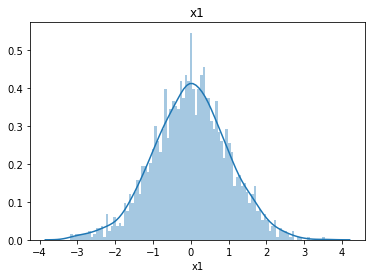

Summary x2


,x2
count,1983
mean,3.49359e-17
std,1.00025
min,-2.98723
25%,-0.669027
50%,0.0114044
75%,0.675926
max,3.1821
skewness,0.0104842
kurtosis,0.0104842


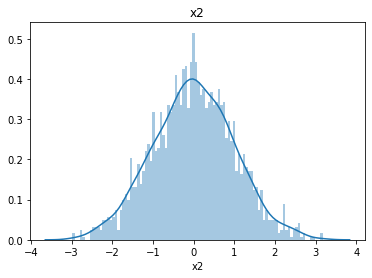

Summary x3


,x3
count,1983
mean,4.12065e-17
std,1.00025
min,-3.63612
25%,-0.674146
50%,0.0229817
75%,0.673967
max,3.58847
skewness,-0.0312675
kurtosis,-0.0312675


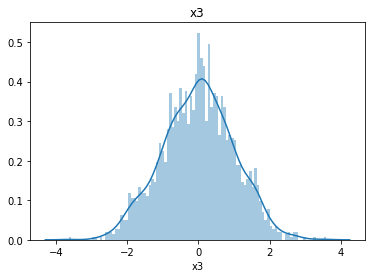

Summary description


,x1,x2,x3
count,1983,1983,1983
mean,4.47896e-18,3.49359e-17,4.12065e-17
std,1.00025,1.00025,1.00025
min,-3.1936,-2.98723,-3.63612
25%,-0.665085,-0.669027,-0.674146
50%,0.00224616,0.0114044,0.0229817
75%,0.659293,0.675926,0.673967
max,3.54682,3.1821,3.58847
skewness,-0.0804751,0.0104842,-0.0312675
kurtosis,-0.0804751,0.0104842,-0.0312675


Show pair-plot: Transformed dataset
Plotting pairs for columns: Index(['x1', 'x2', 'x3'], dtype='object')


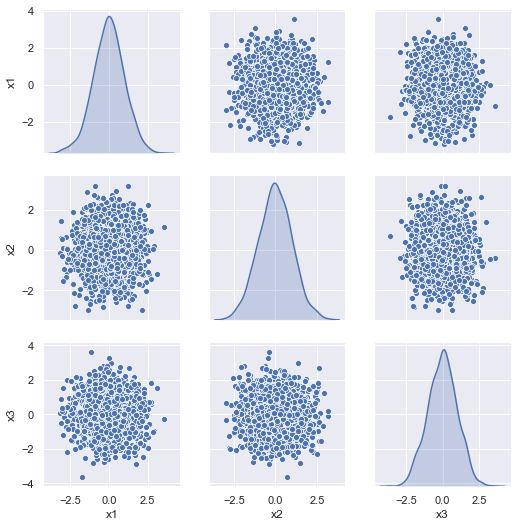

Correlations


""


2019-10-17 12:43:05,012 INFO COLS: Index(['y', 'x1', 'x2', 'x3'], dtype='object') => Index(['y', 'x1', 'x2', 'x3'], dtype='object')


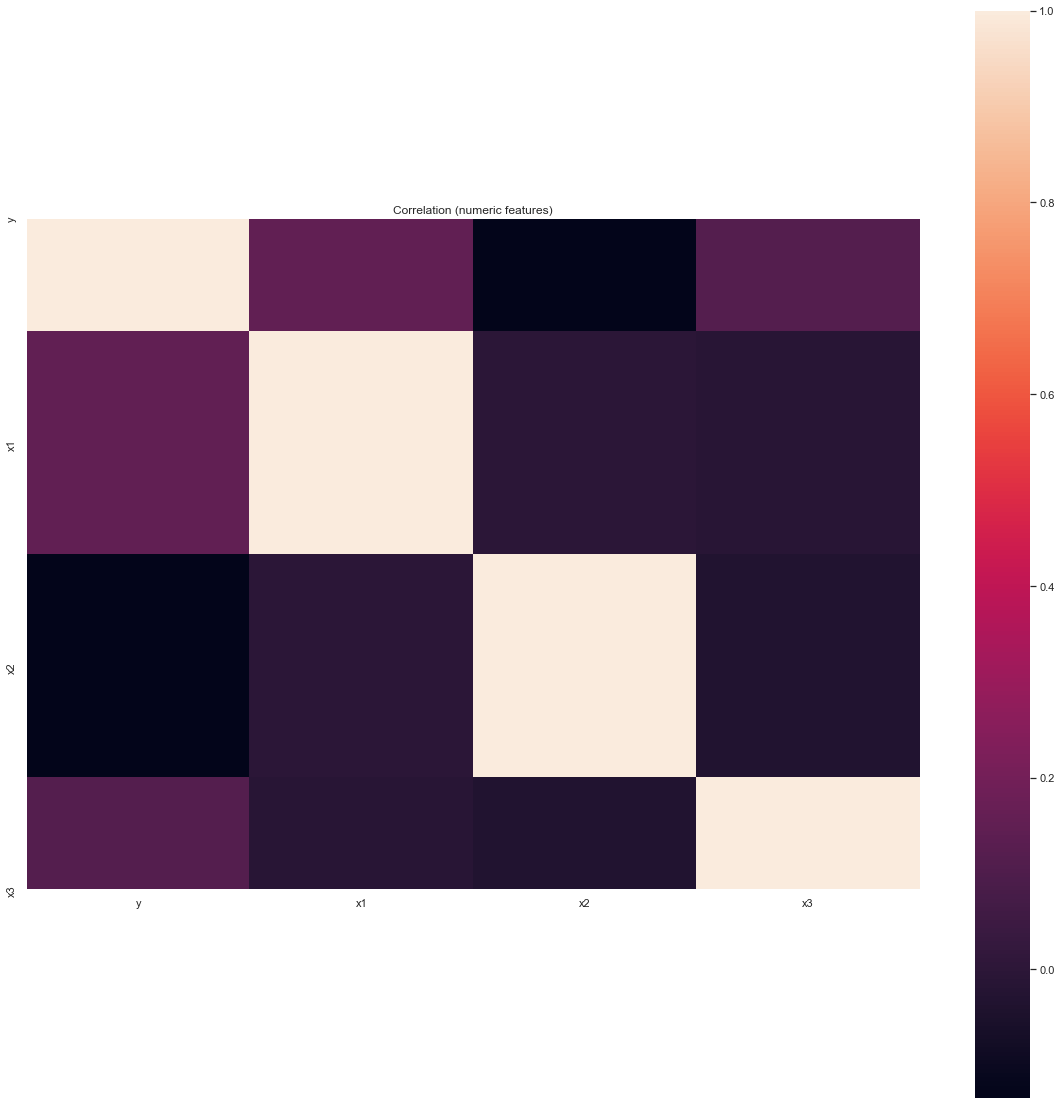

Dendogram: Transformed dataset


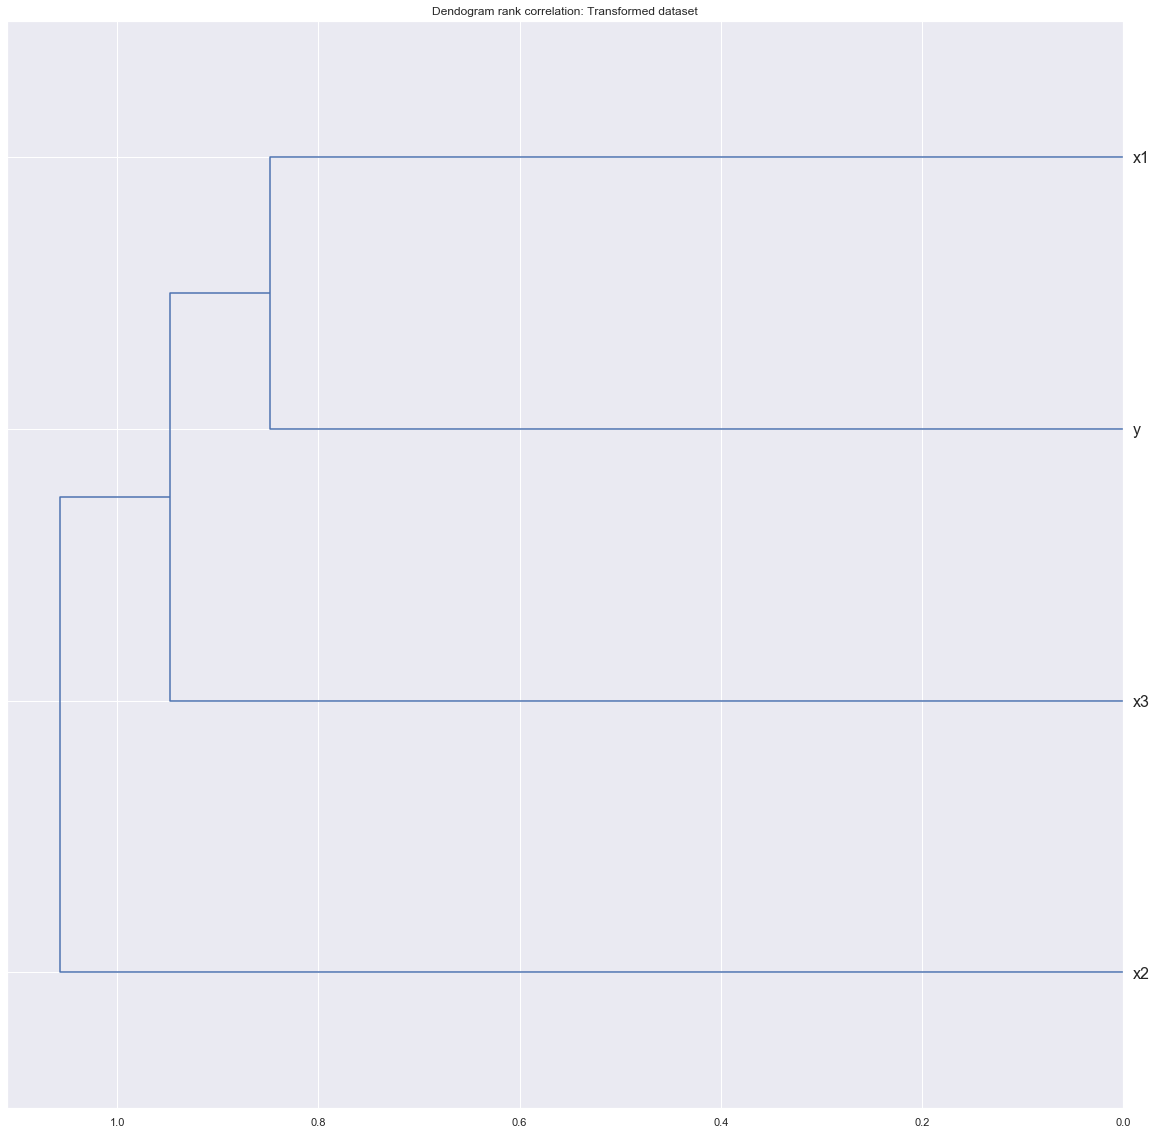

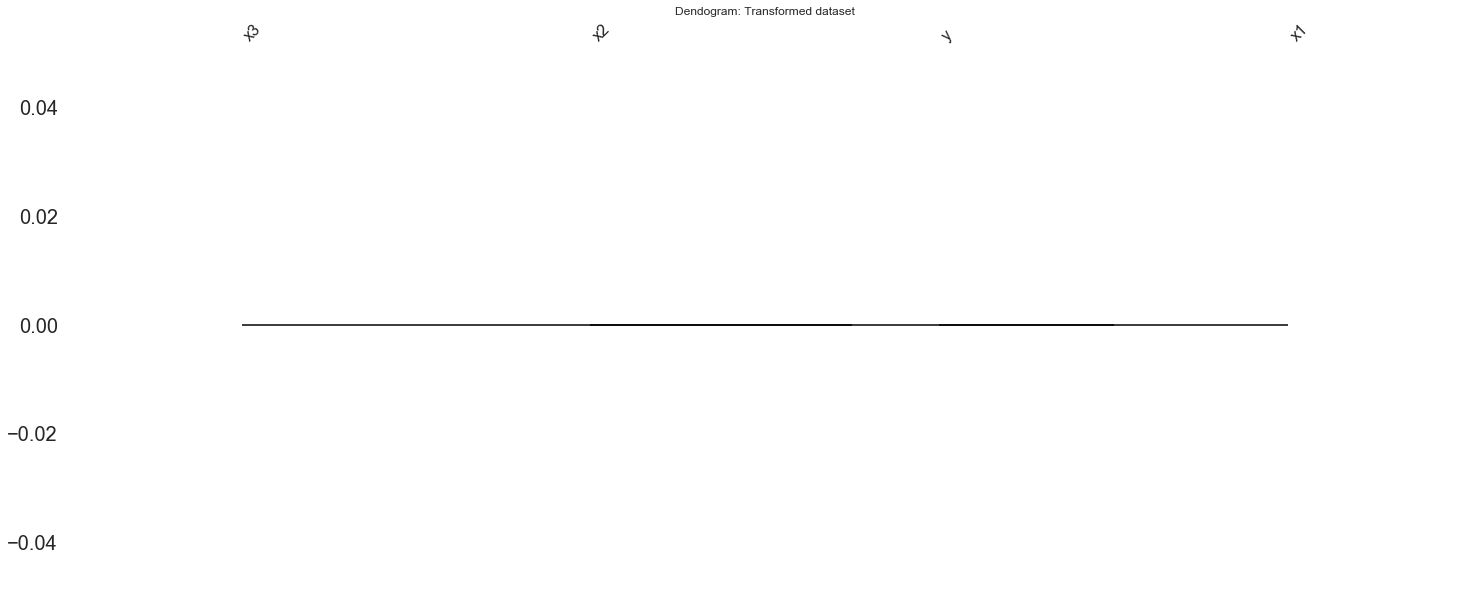

2019-10-17 12:43:07,045 INFO Explore data 'Transformed dataset': End
2019-10-17 12:43:07,104 INFO Feature importance / feature selection (model_type=classification): Start


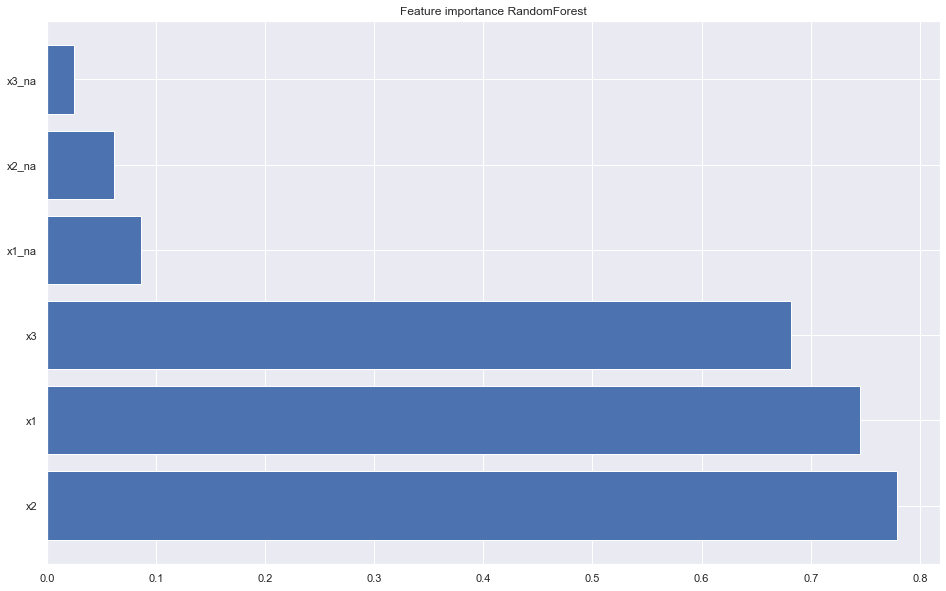

2019-10-17 12:43:08,660 INFO Feature importance: Based on SkLean 'RandomForest'


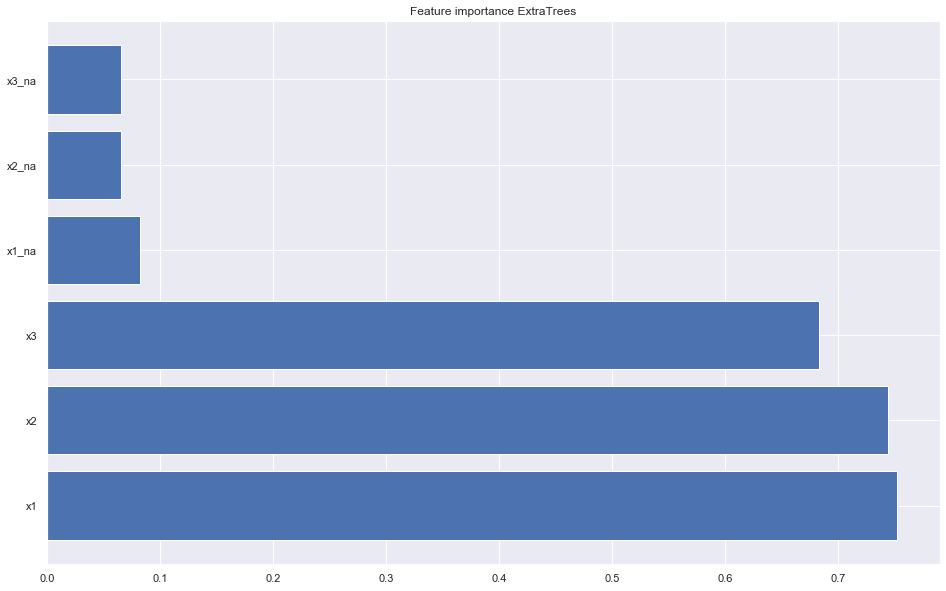

2019-10-17 12:43:10,271 INFO Feature importance: Based on SkLean 'ExtraTrees'


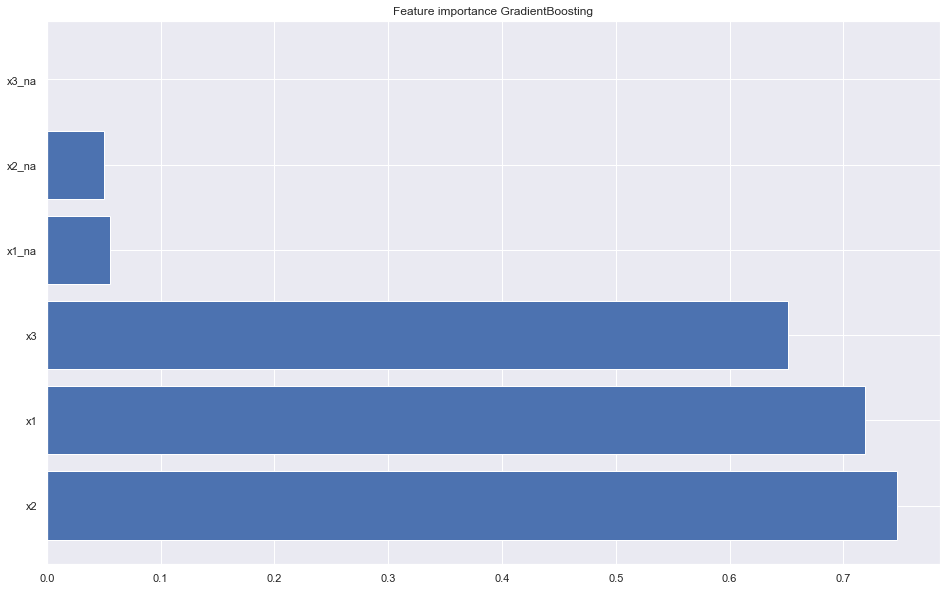

2019-10-17 12:43:11,423 INFO Feature importance: Based on SkLean 'GradientBoosting'


BORUTA: NOT WORKING


2019-10-17 12:43:11,914 INFO Feature importance: Recursive Feature Elimination, model 'RandomForest'
2019-10-17 12:43:14,003 INFO Feature importance: Recursive Feature Elimination, model 'ExtraTrees'
2019-10-17 12:43:15,772 INFO Feature importance: Recursive Feature Elimination, model 'GradientBoosting'
2019-10-17 12:43:17,735 INFO Feature importance: Adding 'rank of rank_sum' column


,importance_model_RandomForest,importance_model_rank_RandomForest,feature_importances_sk_RandomForest,feature_importances_sk_rank_RandomForest,importance_model_ExtraTrees,importance_model_rank_ExtraTrees,feature_importances_sk_ExtraTrees,feature_importances_sk_rank_ExtraTrees,importance_model_GradientBoosting,importance_model_rank_GradientBoosting,feature_importances_sk_GradientBoosting,feature_importances_sk_rank_GradientBoosting,selectf_scores_f_classif,selectf_p_values_f_classif,selectf_keep_f_classif,selectf_rank_f_classif,selectf_scores_mutual_info_classif,selectf_rank_mutual_info_classif,rfe_RandomForest,rfe_ExtraTrees,rfe_GradientBoosting,ranksum,rank_of_ranksum
x2,1.000000,0,0.374658,0,0.989054,1,0.365607,0,1.000000,0,0.349295,0,313.400417,1.450606e-115,True,0,0.172927,0,1,1,1,0,0
x1,0.955461,1,0.332485,1,1.000000,0,0.340572,1,0.961798,1,0.342371,1,275.946045,1.117527e-103,True,1,0.143125,1,2,2,2,1,1
x3,0.871351,2,0.282570,2,0.899824,2,0.288139,2,0.871497,2,0.304222,2,172.208000,1.855711e-68,True,2,0.093208,2,3,3,3,2,2
x1_na,0.081655,3,0.005445,3,0.024436,3,0.002781,3,0.074785,3,0.001641,4,0.022614,9.776400e-01,False,5,0.000000,5,4,4,5,3,3
x2_na,0.048033,4,0.003375,4,0.000000,5,0.001794,4,0.066890,4,0.002383,3,0.180344,8.349997e-01,False,4,0.000000,4,5,5,4,4,4
x3_na,0.000000,5,0.001467,5,0.000000,4,0.001107,5,0.000000,5,0.000087,5,0.728818,4.826392e-01,False,3,0.012924,3,6,6,6,5,5


2019-10-17 12:43:17,756 INFO Tree graph: Random Forest


str_tree=None
Created dot file: 'tree.dot'
Created image: 'tree.png'


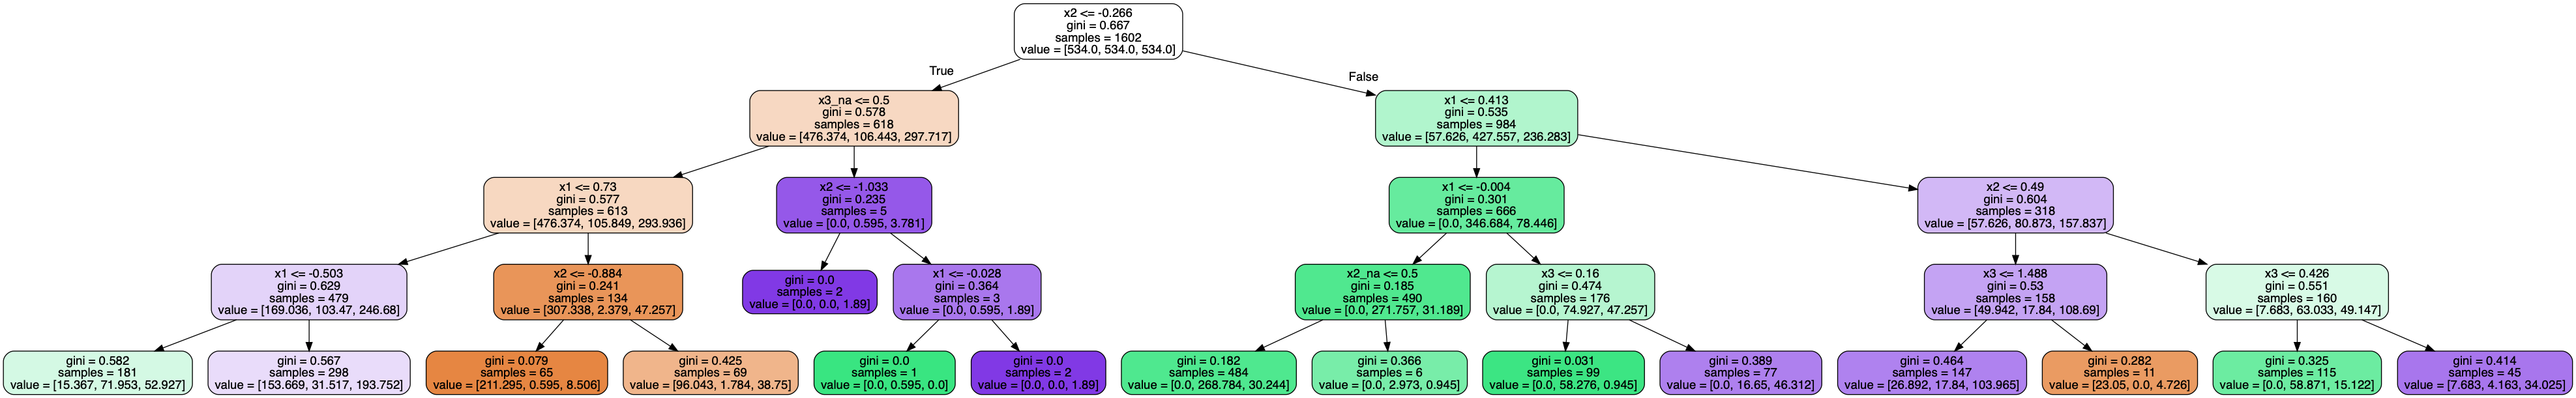

2019-10-17 12:43:17,980 INFO Feature importance / feature selection: End
2019-10-17 12:43:18,014 INFO Model search: Start
2019-10-17 12:43:18,015 INFO Search models: Start
2019-10-17 12:43:18,941 INFO Search: Create dataset=False


  0%|          | 0/20 [00:00<?, ?it/s, best loss: ?]

2019-10-17 12:43:19,571 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:21,389 INFO Hyper parameter optimization:	iteration: 1	fit: 0.2834645669291339	parameters: {'model_create': {'max_features': 0.4162354022003404, 'min_samples_leaf': 78, 'n_estimators': 363}}	best fit: 0.2834645669291339	best parameters: {'model_create': {'max_features': 0.4162354022003404, 'min_samples_leaf': 78, 'n_estimators': 363}}


  5%|▌         | 1/20 [00:02<00:46,  2.44s/it, best loss: 0.2834645669291339]

2019-10-17 12:43:21,917 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:23,428 INFO Hyper parameter optimization:	iteration: 2	fit: 0.2624671916010499	parameters: {'model_create': {'max_features': 0.4366148973672854, 'min_samples_leaf': 65, 'n_estimators': 225}}	best fit: 0.2624671916010499	best parameters: {'model_create': {'max_features': 0.4366148973672854, 'min_samples_leaf': 65, 'n_estimators': 225}}


 10%|█         | 2/20 [00:04<00:41,  2.32s/it, best loss: 0.2624671916010499]

2019-10-17 12:43:23,970 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:26,747 INFO Hyper parameter optimization:	iteration: 3	fit: 0.20734908136482944	parameters: {'model_create': {'max_features': 0.4046645535988719, 'min_samples_leaf': 28, 'n_estimators': 747}}	best fit: 0.20734908136482944	best parameters: {'model_create': {'max_features': 0.4046645535988719, 'min_samples_leaf': 28, 'n_estimators': 747}}


 15%|█▌        | 3/20 [00:07<00:44,  2.62s/it, best loss: 0.20734908136482944]

2019-10-17 12:43:27,402 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:30,727 INFO Hyper parameter optimization:	iteration: 4	fit: 0.10498687664041995	parameters: {'model_create': {'max_features': 0.981936151937332, 'min_samples_leaf': 19, 'n_estimators': 859}}	best fit: 0.10498687664041995	best parameters: {'model_create': {'max_features': 0.981936151937332, 'min_samples_leaf': 19, 'n_estimators': 859}}


 20%|██        | 4/20 [00:11<00:48,  3.03s/it, best loss: 0.10498687664041995]

2019-10-17 12:43:31,470 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:35,028 INFO Hyper parameter optimization:	iteration: 5	fit: 0.10236220472440949	parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 25%|██▌       | 5/20 [00:16<00:51,  3.41s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:35,613 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:37,631 INFO Hyper parameter optimization:	iteration: 6	fit: 0.2545931758530183	parameters: {'model_create': {'max_features': 0.3338141839007989, 'min_samples_leaf': 56, 'n_estimators': 463}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 30%|███       | 6/20 [00:18<00:44,  3.17s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:38,177 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:39,614 INFO Hyper parameter optimization:	iteration: 7	fit: 0.23359580052493434	parameters: {'model_create': {'max_features': 0.6316513636948926, 'min_samples_leaf': 76, 'n_estimators': 239}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 35%|███▌      | 7/20 [00:20<00:36,  2.81s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:40,161 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:41,725 INFO Hyper parameter optimization:	iteration: 8	fit: 0.23884514435695536	parameters: {'model_create': {'max_features': 0.9034749428824242, 'min_samples_leaf': 98, 'n_estimators': 306}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 40%|████      | 8/20 [00:22<00:31,  2.60s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:42,325 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:43,337 INFO Hyper parameter optimization:	iteration: 9	fit: 0.10498687664041995	parameters: {'model_create': {'max_features': 0.833021667009161, 'min_samples_leaf': 23, 'n_estimators': 95}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 45%|████▌     | 9/20 [00:24<00:25,  2.31s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:43,876 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:45,135 INFO Hyper parameter optimization:	iteration: 10	fit: 0.2624671916010499	parameters: {'model_create': {'max_features': 0.4923221119332636, 'min_samples_leaf': 75, 'n_estimators': 174}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 50%|█████     | 10/20 [00:26<00:21,  2.15s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:45,762 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:47,537 INFO Hyper parameter optimization:	iteration: 11	fit: 0.1076115485564304	parameters: {'model_create': {'max_features': 0.9574678924583107, 'min_samples_leaf': 31, 'n_estimators': 314}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 55%|█████▌    | 11/20 [00:28<00:20,  2.23s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:48,058 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:50,764 INFO Hyper parameter optimization:	iteration: 12	fit: 0.2440944881889764	parameters: {'model_create': {'max_features': 0.5257227012173815, 'min_samples_leaf': 92, 'n_estimators': 728}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 60%|██████    | 12/20 [00:31<00:20,  2.53s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:51,342 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:54,654 INFO Hyper parameter optimization:	iteration: 13	fit: 0.20472440944881887	parameters: {'model_create': {'max_features': 0.4247201168451025, 'min_samples_leaf': 26, 'n_estimators': 916}}	best fit: 0.10236220472440949	best parameters: {'model_create': {'max_features': 0.7088016425954862, 'min_samples_leaf': 15, 'n_estimators': 825}}


 65%|██████▌   | 13/20 [00:35<00:20,  2.94s/it, best loss: 0.10236220472440949]

2019-10-17 12:43:55,142 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:43:58,725 INFO Hyper parameter optimization:	iteration: 14	fit: 0.06824146981627299	parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}	best fit: 0.06824146981627299	best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


 70%|███████   | 14/20 [00:39<00:19,  3.28s/it, best loss: 0.06824146981627299]

2019-10-17 12:43:59,289 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:44:01,095 INFO Hyper parameter optimization:	iteration: 15	fit: 0.38057742782152226	parameters: {'model_create': {'max_features': 0.31609904330026245, 'min_samples_leaf': 17, 'n_estimators': 347}}	best fit: 0.06824146981627299	best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


 75%|███████▌  | 15/20 [00:42<00:15,  3.00s/it, best loss: 0.06824146981627299]

2019-10-17 12:44:01,747 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:44:03,002 INFO Hyper parameter optimization:	iteration: 16	fit: 0.15748031496062997	parameters: {'model_create': {'max_features': 0.685325888739855, 'min_samples_leaf': 54, 'n_estimators': 121}}	best fit: 0.06824146981627299	best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


 80%|████████  | 16/20 [00:44<00:10,  2.68s/it, best loss: 0.06824146981627299]

2019-10-17 12:44:03,607 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:44:05,342 INFO Hyper parameter optimization:	iteration: 17	fit: 0.19685039370078738	parameters: {'model_create': {'max_features': 0.699437806694177, 'min_samples_leaf': 70, 'n_estimators': 335}}	best fit: 0.06824146981627299	best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


 85%|████████▌ | 17/20 [00:46<00:07,  2.57s/it, best loss: 0.06824146981627299]

2019-10-17 12:44:05,917 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:44:09,184 INFO Hyper parameter optimization:	iteration: 18	fit: 0.11811023622047245	parameters: {'model_create': {'max_features': 0.8992507420472251, 'min_samples_leaf': 43, 'n_estimators': 838}}	best fit: 0.06824146981627299	best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


 90%|█████████ | 18/20 [00:50<00:05,  2.96s/it, best loss: 0.06824146981627299]

2019-10-17 12:44:09,727 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:44:13,247 INFO Hyper parameter optimization:	iteration: 19	fit: 0.09711286089238846	parameters: {'model_create': {'max_features': 0.6409214330055764, 'min_samples_leaf': 10, 'n_estimators': 925}}	best fit: 0.06824146981627299	best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


 95%|█████████▌| 19/20 [00:54<00:03,  3.29s/it, best loss: 0.06824146981627299]

2019-10-17 12:44:13,845 INFO Creating model based on class 'sklearn.ensemble.RandomForestClassifier'
2019-10-17 12:44:16,198 INFO Hyper parameter optimization:	iteration: 20	fit: 0.10236220472440949	parameters: {'model_create': {'max_features': 0.6128305371359186, 'min_samples_leaf': 12, 'n_estimators': 540}}	best fit: 0.06824146981627299	best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


100%|██████████| 20/20 [00:57<00:00,  2.86s/it, best loss: 0.06824146981627299]

2019-10-17 12:44:16,200 INFO Hyper parameter search best fit:{'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}, best parameters: {'model_create': {'max_features': 0.5259656689089045, 'min_samples_leaf': 3, 'n_estimators': 947}}


2019-10-17 12:44:17,397 INFO Creating model based on class 'sklearn.tree.DecisionTreeClassifier'
2019-10-17 12:44:19,060 INFO Creating model based on class 'sklearn.ensemble.GradientBoostingClassifier'
2019-10-17 12:44:21,100 INFO Creating model based on class 'sklearn.naive_bayes.BernoulliNB'
2019-10-17 12:44:22,502 INFO Creating model based on class 'sklearn.neighbors.NearestCentroid'
2019-10-17 12:44:23,968 INFO Creating model based on class 'sklearn.svm.SVC'
2019-10-17 12:44:25,582 INFO Creating model based on class 'sklearn.linear_model.Perceptron'
2019-10-17 12:44:27,040 INFO Creating model based on class 'sklearn.naive_bayes.GaussianNB'
2019-10-17 12:44:28,361 INFO Creating model based on class 'sklearn.ensemble.AdaBoostClassifier'
2019-10-17 12:44:30,141 INFO Creating model based on class 'sklearn.ensemble.ExtraTreesClassifier'
2019-10-17 12:44:32,039 INFO Creating model based on class 'sklearn.linear_model.LogisticRegressionCV'
2019-10-17 12:44:35,458 INFO Creating model based

,train,validation,time,n_estimators,criterion,min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_features,min_impurity_decrease,bootstrap,oob_score,n_jobs,verbose,warm_start,presort,splitter,learning_rate,loss,max_depth,subsample,tol,validation_fraction,alpha,binarize,fit_prior,metric,C,cache_size,coef0,decision_function_shape,degree,gamma,kernel,max_iter,probability,shrinking,early_stopping,eta0,fit_intercept,n_iter_no_change,random_state,shuffle,var_smoothing,algorithm,Cs,cv,dual,intercept_scaling,multi_class,penalty,refit,solver,leaf_size,n_neighbors,p,weights,average,radius,bootstrap_features,max_samples
sklearn.linear_model.LogisticRegressionCV.20191017.164431.630013.42,0.016854,0.015748,2.231147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,10.0,5.0,False,1.0,auto,l2,True,lbfgs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.svm.SVC.20191017.164423.567505.32,0.024345,0.031496,0.392347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0010,NaN,NaN,NaN,NaN,NaN,1.0,200.0,0.0,ovr,3.0,scale,rbf,-1.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.neighbors.KNeighborsClassifier.20191017.164435.035090.44,0.033708,0.041995,0.374763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,minkowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,5.0,2.0,uniform,NaN,NaN,NaN,NaN
sklearn.svm.LinearSVC.20191017.164436.573309.46,0.046192,0.049869,0.311274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,0.0001,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,ovr,l2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.ensemble.ExtraTreesClassifier.20191017.164429.702805.40,0.000000,0.060367,0.811125,100.0,gini,2.0,1.0,0.0,auto,0.0,False,False,-1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.ensemble.GradientBoostingClassifier.20191017.164418.517485.26,0.008739,0.068241,1.066013,100.0,friedman_mse,2.0,1.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,False,auto,NaN,0.1,deviance,3.0,1.0,0.0001,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.ensemble.RandomForestClassifier.20191017.164354.742506.16,0.012484,0.068241,6.123639,947.0,gini,2.0,3.0,0.0,0.525966,0.0,True,False,-1.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.linear_model.Perceptron.20191017.164425.099222.34,0.074906,0.073491,0.344339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,0.0010,0.1,0.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,NaN,NaN,False,1.0,True,5.0,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.neighbors.NearestCentroid.20191017.164422.201846.30,0.089263,0.086614,0.262841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,euclidean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sklearn.neighbors.RadiusNeighborsClassifier.20191017.164440.948699.52,0.063046,0.086614,0.551098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,minkowski,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,2.0,uniform,NaN,1.0,NaN,NaN


True

In [4]:
from logml import *

ml = LogMl('config/class3.yaml', verbose=True)
ml()